## Exercício: Curva de Benefício

Assuma que estamos lidando com um problema de churn e gostaríamos de entender qual o threshold ótimo da minha classificação. Considere que:
- `y_pred` é o output do meu classificador, indicando a probabilidade de um cliente dar churn, obtido em um backtest
- `y` é o valor real medido, no backtest

Nesta ação, os clientes identificados com alta probabilidade de churn irão receber um voucher de R$30,00 de compras, através de uma ação no próprio site e divulgação por push. Assuma ainda que:

- Cada cliente tem um LTV potencial futuro de R\$ 200,00 (ou seja, perder um cliente custa esse valor para a empresa)
- A ação comercial é 100% eficaz para evitar o churn: O cliente impactado pela iniciativa tem 100% de chance de permanecer na empresa



Obs.: Para cálculo dos valores financeiros, a sugestão é sempre comparar com um caso de referência (ex. caso não houvesse nenhum modelo de churn)

- Valor Monetário de **TN: 0,00** - clientes que não deram churn e que meu modelo indicou corretamente
- Valor Monetário de **FP: -30,00** - clientes que não dariam churn, mas o modelo apontou que dariam. Neste caso, minha ação de evitar churn foi em vão
- Valor Monetário de **FN: 0,00** - clientes que deram churn e meu modelo não detectou. Neste caso, perco o cliente, mas perderia de qualquer forma se não houvesse o modelo (importância de definir um caso de referência!)
- Valor Monetário de **TP: 170,00** - clientes que eu corretamente identifiquei como churn e consegui evitar com a ação comercial. Neste caso, mantenho um cliente avaliado em 200,00, gastando um total de 30,00

In [1]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

N = 10000
y_pred = np.random.poisson(10, N)
y_pred = y_pred/max(y_pred)

# Create y
y = y_pred -0.2 + np.random.randn(N)/5
y = y.round(0)
y = np.clip(y, 0, 1)

In C:\Users\Borba\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Borba\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Borba\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Borba\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Borba\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

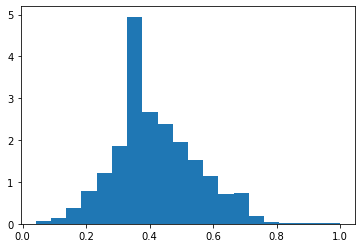

In [2]:
count, bins, ignored = plt.hist(y_pred, 20, density=True)
plt.show()

In [21]:
100*sum(y)/len(y)

11.77

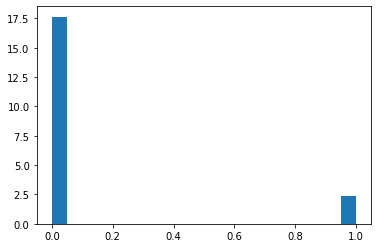

In [3]:
count, bins, ignored = plt.hist(y, 20, density=True)
plt.show()

### Métrica - AUC

Visualizando métricas simples, que independem do theshold

In [4]:
roc_auc_score(y, y_pred)

0.8027915857902479

### Confusion Matrix
Pela matriz de confusão, obtemos os valores de TN, FN, TP, FP

In [5]:
threshold = 0.5
y_pred_round = [1 if x >= threshold else 0 for x in y_pred]
CM = confusion_matrix(y, y_pred_round)
CM

array([[6593, 2230],
       [ 346,  831]], dtype=int64)

In [12]:
f1_score(y, y_pred_round)

0.39216611609249646

In [13]:
TN = CM[0][0] # 0 -> nao fiz acao, nao deu churn
FN = CM[1][0] # 0 -> nao fiz acao, e cliente deu churn, mas ja daria mesmo sem o modelo de predicao (entao, em relacao ao caso de refenrencia, custo 0)
TP = CM[1][1] # +++ -> gastei com a acao, mas conseguir reter o cliente (+LTV)
FP = CM[0][1] # -- -> gastei com a acao, mas cliente nao daria churn

In [16]:
# de todos que eu falo que são positivos, acerto precision%
precision = TP / (TP + FP)
precision

0.2714799085266253

In [17]:
# de todos que de fato são positivos, consigo identificar recall%
recall = TP / (TP + FN)
recall

0.7060322854715378

### Curva de Benefício

Construa a Curva de benefício. 
- Qual o melhor threshold? 
- Esta ação vale a pena? 
- O que você acha que conteceria se o modelo perder performance? Custos da ação aumentarem ou o LTV do cliente diminuir? Se as classes deste problema forem mais ou menos desbalanceadas?

In [ ]:
FPcost = -30
TPcost = 170
value_total_vec = []
array_thresh = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0, 1.1]
for threshold in array_thresh:
    # define 1/0's
    # create confusion matrix
    # compute total value (based on costs defined above)
    # save the results in value_total_vec